In [1]:
%matplotlib inline

import pandas as pd

In [2]:
IRIS_DATASET_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(IRIS_DATASET_URL, header=None)

In [3]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# extract samples where classnames are Setosa and Versicolor and transform them to a vector of
# target values (-1 and 1 respectively)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

In [6]:
# extract petal length and sepal length features for those 100 samples and put them in
# a 2-column matrix
X = df.iloc[0:100, (0,2)].values

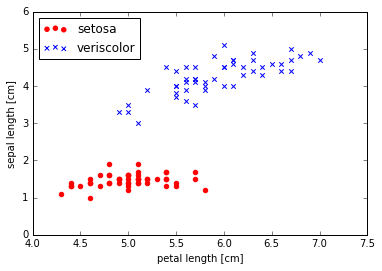

In [7]:
# Scatterplot
plt.scatter(X[:50, 0], X[:50, 1], 
           color='red', marker='o', label='setosa')

plt.scatter(X[50:100, 0], X[50:100, 1],
           color='blue', marker='x', label='veriscolor')

plt.xlabel('petal length [cm]')
plt.ylabel('sepal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [8]:
# Training the perceptron
from perceptron import Perceptron
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

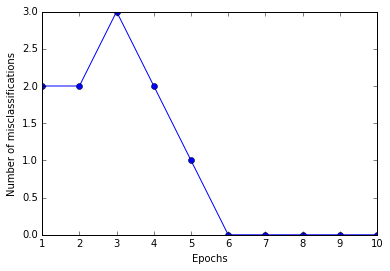

In [9]:
# Plot misclassification errors
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_,
        marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

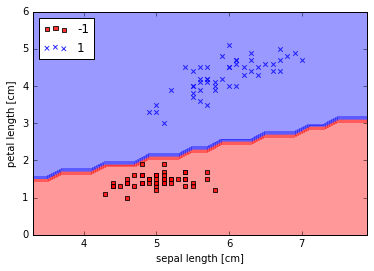

In [11]:
# Plot decision boundary

from lib import plot_decision_regions
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

### Adaline

In [12]:
from adaline import AdalineGD

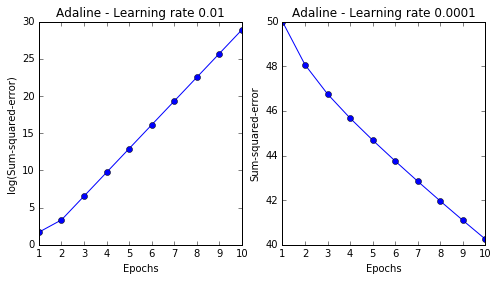

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(np.arange(1, len(ada1.cost_) + 1),
          np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(np.arange(1, len(ada2.cost_) + 1),
          ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

# with a learning rate of 0.01 we overshoot the global min
# and it doesn't converge, but the errors keep growing
# with a smaller rate of 0.0001 it converges by may
# take many epochs to do so, which is bad for performance

### Standardization

In [31]:
# standardize features (x - x_mean)/std
X_std = np.copy(X)
X_std[:,0] = (X[:, 0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:, 1] - X[:,1].mean()) / X[:,1].std()

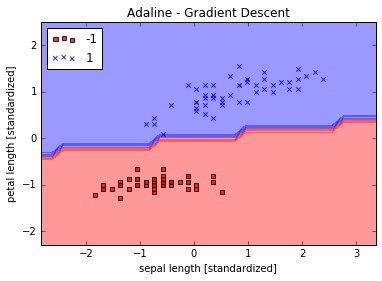

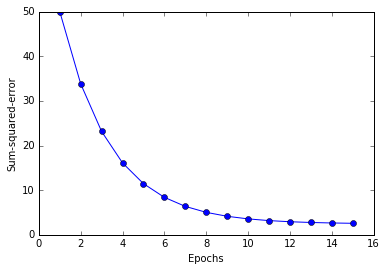

In [32]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

# with feature scaling (standardized features), Adaline
# converges with a learning rate of 0.01